# House prices

*This notebook first appeared as a part of [GHBD]().*

*License: [MIT](http://opensource.org/licenses/MIT)*

*(C) 2016, Tim Head.*
*Feel free to use, distribute, and modify with the above attribution.*

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

from sklearn.datasets.california_housing import fetch_california_housing

In [3]:
cal_housing = fetch_california_housing()

In [47]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.1,
                                                    random_state=1)

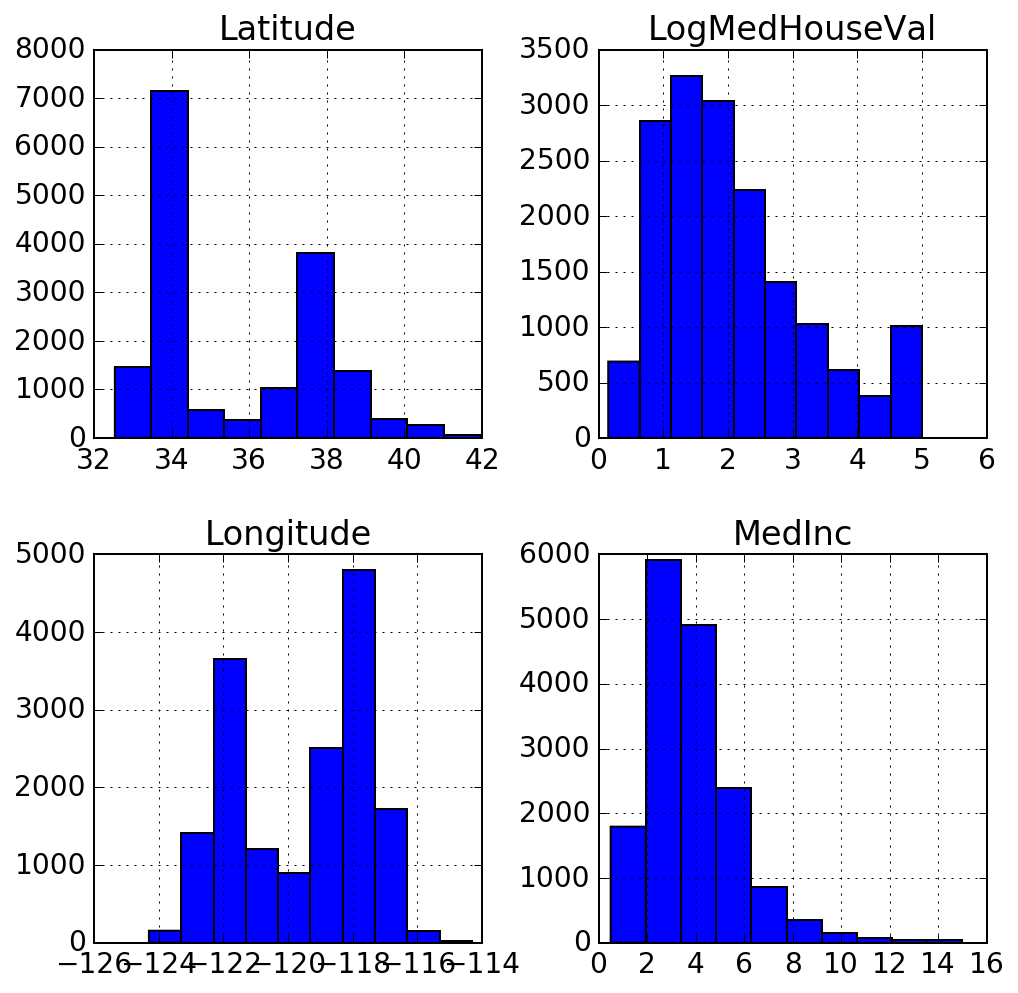

In [5]:
names = cal_housing.feature_names

df = pd.DataFrame(data=X_train, columns=names)
df['LogMedHouseVal'] = y_train
_ = df.hist(column=['Latitude', 'Longitude', 'MedInc', 'LogMedHouseVal'])

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

In [7]:
from mpl_toolkits.mplot3d import Axes3D

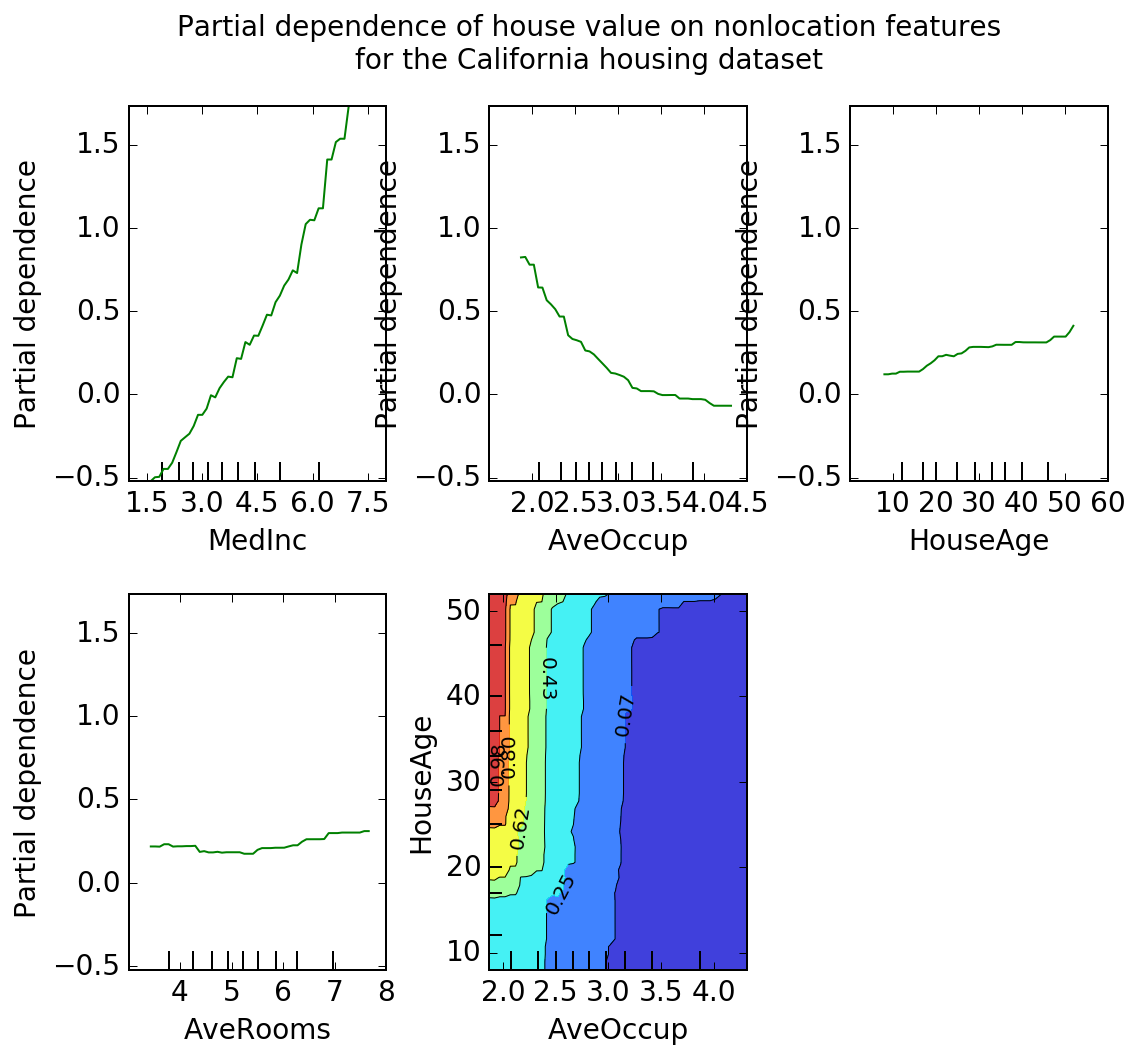

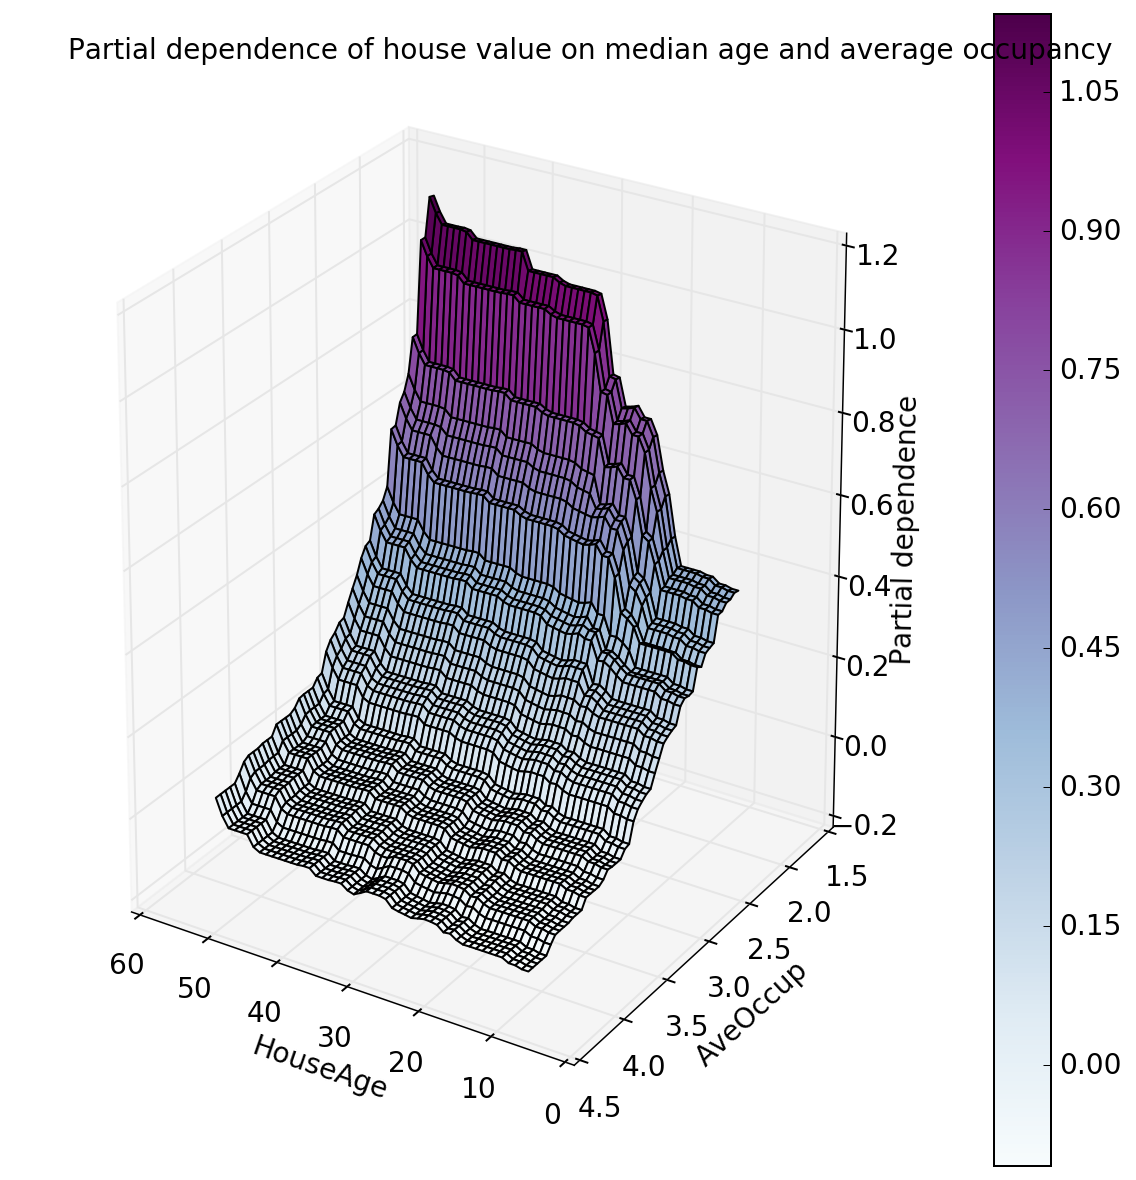

In [8]:
clf = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)

features = [0, 5, 1, 2, (5, 1)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
             'for the California housing dataset')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle


fig = plt.figure()

target_feature = (1, 5)
pdp, (x_axis, y_axis) = partial_dependence(clf, target_feature,
                                           X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(x_axis, y_axis)
Z = pdp.T.reshape(XX.shape).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median age and '
             'average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()

In [9]:
for n, name in enumerate(names):
    print(n, name)

0 MedInc
1 HouseAge
2 AveRooms
3 AveBedrms
4 Population
5 AveOccup
6 Latitude
7 Longitude


In [49]:
clf = GradientBoostingRegressor(n_estimators=300, max_depth=4,
                                learning_rate=0.1, loss='huber',
                                random_state=1)
clf.fit(X_train, y_train)
features = [(7, 6)]


pdp, (x_axis, y_axis) = partial_dependence(clf, features,
                                           X=X_train, grid_resolution=200)

In [50]:
pdp.shape, X_train.shape, x_axis.shape

((1, 40000), (18576, 8), (200,))

In [51]:
x_axis.min(), x_axis.max(), y_axis.min(), y_axis.max()

(-122.47000122070312,
 -117.08000183105469,
 32.819999694824219,
 38.939998626708984)

In [82]:
from mpl_toolkits.basemap import Basemap

def california_map(ax=None,
                   lllat=32, urlat=42.5,
                   lllon=-124, urlon=-114):
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='l'
               )
    m.drawstates()
    m.drawcountries()
    m.drawcoastlines(color='blue')
    
    m.drawparallels(np.arange(30,50,5),labels=[1,1,0,0])
    m.drawmeridians(np.arange(-130,-110,2),labels=[0,0,0,1])
    
    return m

[-122.47000122 -122.4429158  -122.41583037 -122.38874495 -122.36165952
 -122.3345741  -122.30748868 -122.28040325 -122.25331783 -122.2262324 ]
[ 32.81999969  32.81999969  32.81999969  32.81999969  32.81999969
  32.81999969  32.81999969  32.81999969  32.81999969  32.81999969]


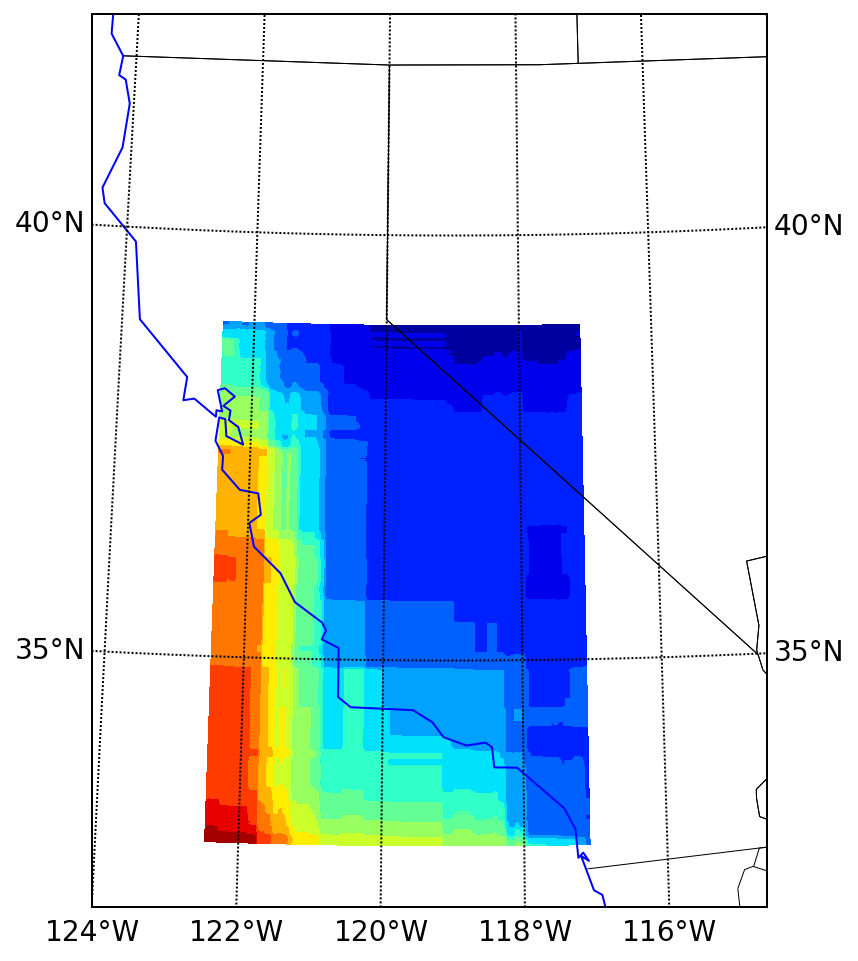

In [84]:
m = california_map()

XX, YY = np.meshgrid(x_axis, y_axis)
print(XX[0,:10])
print(YY[0,:10])

Z = np.ones_like(XX)
Z = pdp.reshape(XX.shape)

#XX, YY = np.meshgrid(*m(y_axis, x_axis))
#Z = pdp.T.reshape(XX.shape).T

m.contourf(XX, YY, Z, 15, latlon=True)
#m.scatter([-122.47000122, -122.4429158], [32.81999969, 32.81999969], latlon=True)